In [1]:
using Pkg
# Pkg.add("LibGEOS")
# Pkg.add("Plots")
# Pkg.add("LinearAlgebra")
# Pkg.add("SparseArrays")
# Pkg.add("Arpack")
# Pkg.add("DataFrames")
# Pkg.add("GLM")
# Pkg.add("LaTeXStrings")
# Pkg.add("CSV")

In [2]:
using LibGEOS
using Plots
using LinearAlgebra
using SparseArrays
using Arpack
using DataFrames
using GLM
using LaTeXStrings
using CSV

In [3]:
l = 4    # Fractal level


4

In [4]:
L = 1.0  # lenght of linesegment
starting_point = (0.0,0.0)
ending_point = (L,0.0)

function rotate_points(points::Vector{Tuple{Float64, Float64}}, angle::Float64, pivot::Tuple{Float64, Float64})
    # Extract the first point as the pivot
    px, py = pivot

    # Create the rotation matrix
    rot_mat = [cos(angle) -sin(angle); sin(angle) cos(angle)]

    # Rotate each point (except the first one)
    rotated_points = [pivot]
    for i in 1:length(points)-1
        x, y = points[i]
        # Translate point to origin
        translated_point = [x-px, y - py]
        # Apply rotation
        rotated_point = rot_mat * translated_point
        # Translate point back
        rotated_point = rotated_point .+ [px, py]
        push!(rotated_points, (rotated_point[1], rotated_point[2]))
    end

    return rotated_points
end

function segment_fractalizer(s_p::Tuple{Float64, Float64}, e_p::Tuple{Float64, Float64}, D::Float64)
    """
    s_p: starting point of the line segment
    e_p: ending point of the line segment
    l: fractal level
    """
    point_list = [s_p]
    new_point = (point_list[1][1] + D/4.0, point_list[1][2])
    push!(point_list, new_point)
    new_point = (point_list[2][1], point_list[2][2] + D/4.0)
    push!(point_list, new_point)
    new_point = (point_list[3][1] + D/4.0, point_list[3][2])
    push!(point_list, new_point)
    new_point = (point_list[4][1], point_list[4][2]-D/4.0)
    push!(point_list, new_point)
    new_point = (point_list[5][1], point_list[5][2]-D/4.0)
    push!(point_list, new_point)
    new_point = (point_list[6][1]+D/4.0, point_list[6][2])
    push!(point_list, new_point)
    new_point = (point_list[7][1], point_list[7][2]+D/4.0)
    push!(point_list, new_point)
    push!(point_list, e_p)
    return point_list

end

segment_fractalizer (generic function with 1 method)

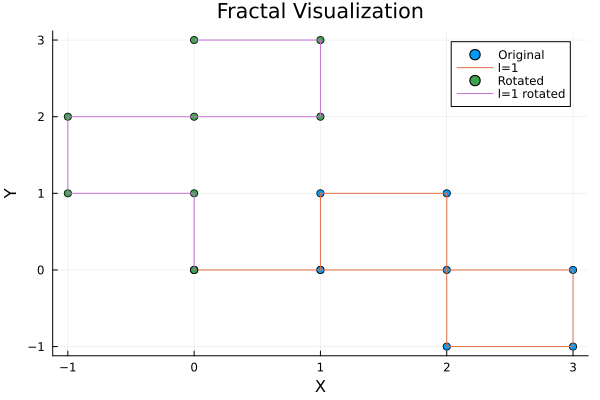

In [5]:
l1_fractal = segment_fractalizer(starting_point, ending_point, 4.0)

# display(length(l1_fractal))
x_coords = [p[1] for p in l1_fractal]
y_coords = [p[2] for p in l1_fractal]
scatter(x_coords, y_coords, title="Fractal Visualization", xlabel="X", ylabel="Y", label="Original")
plot!(x_coords, y_coords, title="Fractal Visualization", xlabel="X", ylabel="Y", label="l=1")
l1_rotated = rotate_points(l1_fractal, pi/2, l1_fractal[1])
x_coords = [p[1] for p in l1_rotated]
y_coords = [p[2] for p in l1_rotated]
scatter!(x_coords, y_coords, label="Rotated")
plot!(x_coords, y_coords, label="l=1 rotated")

In [6]:
function koch_fractal_generator(old_point_list::Vector{Tuple{Float64, Float64}}, l::Int64)
    """
    old_point_list: list of points of l=0
    l: fractal level, l>0
    """
    point_list = old_point_list
    for i = 1:l
        new_point_list = []    
        for j = 2:length(point_list)
            s_p = point_list[j-1]
            e_p = point_list[j]
            D = norm(e_p .- s_p)

            new_points = segment_fractalizer(s_p, e_p, D)

            if (s_p[2] - e_p[2]) > 0
                new_points = rotate_points(new_points, -pi/2, s_p)
            elseif (s_p[2] - e_p[2]) < 0
                new_points = rotate_points(new_points, pi/2, s_p)
            elseif (s_p[1] - e_p[1]) > 0
                new_points = rotate_points(new_points, pi/1, s_p)
            end
            new_points = [(round(p[1], digits=2*l), round(p[2], digits=2*l)) for p in new_points]
            # new_points = [(p[1], p[2]) for p in new_points]
            append!(new_point_list, new_points)
        end

        point_list = new_point_list
        push!(point_list, old_point_list[end])
    end
    
    return point_list
end

koch_fractal_generator (generic function with 1 method)

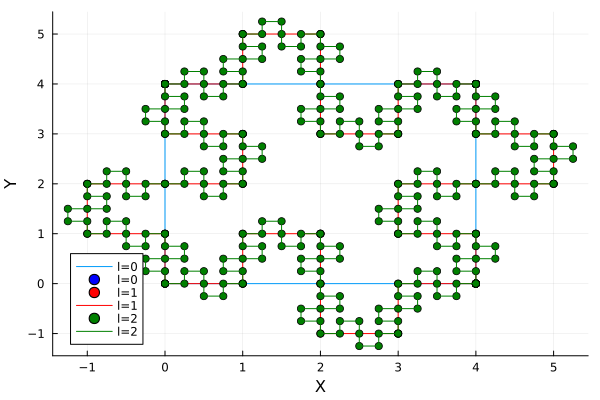

In [7]:
test_line = [(0.0,0.0), (4.0,0.0), (4.0,4.0), (0.0,4.0), (0.0,0.0)]
test_1 = koch_fractal_generator(test_line, 1)
test_2 = koch_fractal_generator(test_line, 2)
test_3 = koch_fractal_generator(test_line, 3)
# println(test_2)
x_coords = [p[1] for p in test_line]
y_coords = [p[2] for p in test_line]
x_coords_1 = [p[1] for p in test_1]
y_coords_1 = [p[2] for p in test_1]
x_coords_2 = [p[1] for p in test_2]
y_coords_2 = [p[2] for p in test_2]
x_coords_3 = [p[1] for p in test_3]
y_coords_3 = [p[2] for p in test_3]
plot(x_coords, y_coords, xlabel="X", ylabel="Y", label="l=0")
scatter!(x_coords, y_coords, color=:blue, label="l=0")
scatter!(x_coords_1, y_coords_1, xlabel="X", ylabel="Y", color=:red, label="l=1")
plot!(x_coords_1, y_coords_1, xlabel="X", ylabel="Y", color=:red, label="l=1")
scatter!(x_coords_2, y_coords_2, xlabel="X", ylabel="Y", color=:green, label="l=2")
plot!(x_coords_2, y_coords_2, xlabel="X", ylabel="Y", color=:green, label="l=2")
# scatter!(x_coords_3, y_coords_3, xlabel="X", ylabel="Y", color=:purple, label="l=3")
# plot!(x_coords_3, y_coords_3, xlabel="X", ylabel="Y", color=:purple, label="l=3")

In [8]:
function lattice_generator(L::Float64, l::Int)
    points = []
    # push!(bonds, (N, 2*N))
    delta = 1/(4^l)
    L_l = 1 + 2.0*sum(4.0^(-k) for k in 1:l)
    N = round(Int, 4.0^l*(1.0+2.0*sum(4.0^(-k) for k in 1:l)))+1   # Number of points in each direction

    # display(N)
    for i in 1:N
        for j in 1:N
            push!(points, (-L_l/2 + (i-1)*delta, -L_l/2 + (j-1)*delta))
        end
    end
    return points
end

lattice_generator (generic function with 1 method)

In [9]:
L = 1.0  # Length of starting square

L_l = 1 + 2.0*sum(4.0^(-k) for k in 1:l)  # Dimensionless length of square lattice 
box = [(-L/2, -L/2), (L/2, -L/2), (L/2, L/2), (-L/2, L/2), (-L/2, -L/2)]
# println(lat*tice_generator(L, l))
lattice = lattice_generator(L, l)
fractal = koch_fractal_generator(box, l)
x_coords_lat = [p[1] for p in lattice]
y_coords_lat = [p[2] for p in lattice]
x_coords_box = [p[1] for p in box]
y_coords_box = [p[2] for p in box]
x_coords_frac = [p[1] for p in fractal]
y_coords_frac = [p[2] for p in fractal]

fractal_plot = plot(x_coords_frac, y_coords_frac, label="Fractal", color=:green, linewidth=2)       # Fractal, lines 
# scatter!(x_coords_frac, y_coords_frac, label="Fractal", color=:black, markersize=1)   # Fractal, points
# scatter!(x_coords_box, y_coords_box, label="box", color=:green)                         # Box, points
plot!(x_coords_box, y_coords_box, label="box", color=:blue, linewidth=2)               # Box, lines
# scatter!(x_coords_lat, y_coords_lat, xlabel="x/L", ylabel="y/L", label="grid", markersize=0.5) # Grid

filename = "figures/l$(l)/fractal_l$(l).svg"
savefig(fractal_plot, filename)


"c:\\Users\\jonas\\Documents\\Codespace\\TFY4235\\Numerical_Physics\\Project_Fractal_Drum\\figures\\l4\\fractal_l4.svg"

In [10]:
N_l = round(Int, L_l/(L/4^l))
println((N_l+1)^2)

lattice_matrix = reshape(lattice, N_l+1, N_l+1)

182329


427×427 Matrix{Any}:
 (-0.832031, -0.832031)  (-0.828125, -0.832031)  …  (0.832031, -0.832031)
 (-0.832031, -0.828125)  (-0.828125, -0.828125)     (0.832031, -0.828125)
 (-0.832031, -0.824219)  (-0.828125, -0.824219)     (0.832031, -0.824219)
 (-0.832031, -0.820312)  (-0.828125, -0.820312)     (0.832031, -0.820312)
 (-0.832031, -0.816406)  (-0.828125, -0.816406)     (0.832031, -0.816406)
 (-0.832031, -0.8125)    (-0.828125, -0.8125)    …  (0.832031, -0.8125)
 (-0.832031, -0.808594)  (-0.828125, -0.808594)     (0.832031, -0.808594)
 (-0.832031, -0.804688)  (-0.828125, -0.804688)     (0.832031, -0.804688)
 (-0.832031, -0.800781)  (-0.828125, -0.800781)     (0.832031, -0.800781)
 (-0.832031, -0.796875)  (-0.828125, -0.796875)     (0.832031, -0.796875)
 ⋮                                               ⋱  
 (-0.832031, 0.800781)   (-0.828125, 0.800781)      (0.832031, 0.800781)
 (-0.832031, 0.804688)   (-0.828125, 0.804688)      (0.832031, 0.804688)
 (-0.832031, 0.808594)   (-0.828125, 0.808

## Classification of lattice points

In [11]:
println("Number of points in lattice: ", length(lattice))
println("Number of points in the fractal: ", length(fractal))

goal = (L/L_l*L)^2   # Expectation
println("Expected number of lattice point inside fractal: ", goal*length(lattice))

Number of points in lattice: 182329
Number of points in the fractal: 26245
Expected number of lattice point inside fractal: 65844.04187881594


In [12]:
# Within polyon using LibGEOS
""" Here Github Copilot was used to help find correct function and to 
format the lattice points to to be compatible wiht LibGEOS"""
ring = LinearRing([collect(p) for p in fractal])  # Convert tuples to arrays

polygon = Polygon(ring)  # Creates a polygon

function points_inside_polygon(points, polygon)
    filter(p -> within(Point(p...), polygon), points)
end

inside_lattice = points_inside_polygon(lattice, polygon)  # Points inside the polygon
println("Number of points inside the polygon: ", length(inside_lattice))

Number of points inside the polygon: 57345


In [13]:
function lattice_classifier(lattice, fractal, inside_lattice)
    classified_lattice = ones(length(lattice)).*(-1)
    fractal_set = Set(fractal)
    inside_lattice_set = Set(inside_lattice)
    for i in 1:length(lattice)
        if lattice[i] in fractal_set
            classified_lattice[i] = 0
        
         elseif lattice[i] in inside_lattice_set
            classified_lattice[i] = 1
        end
       
    end
    # classified_lattice = [1 for p in lattice if p in inside_lattice]
    # classified_lattice = append!(classified_lattice, [0 for p in lattice if p in fractal])
    return classified_lattice
end


lattice_classifier (generic function with 1 method)

In [14]:
classified_lattice = lattice_classifier(lattice, fractal, inside_lattice)

182329-element Vector{Float64}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  ⋮
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

In [15]:
classified_matrix = reshape(classified_lattice, N_l+1, N_l+1)
x = range(-L_l/2, L_l/2, N_l+1)
y = range(-L_l/2, L_l/2, N_l+1)

within_polygon_plot = heatmap(x, y, classified_matrix, xlabel="x/L", ylabel="y/L", color=:plasma)
plot!(x_coords_frac, y_coords_frac, xlabel="X", ylabel="Y", label="Fractal", color=:black)

filename = "figures/l$(l)/classified_lattice_within_l$(l).svg"
savefig(within_polygon_plot, filename)


"c:\\Users\\jonas\\Documents\\Codespace\\TFY4235\\Numerical_Physics\\Project_Fractal_Drum\\figures\\l4\\classified_lattice_within_l4.svg"

In [16]:
# Winding number test

function winding_number(lattice_matrix, fractal)
    # classification_matrix = round.(Int, ones(size(lattice_matrix)).*(-1))
    n_rows, n_cols = size(lattice_matrix)
    classification_matrix = fill(-1, n_rows, n_cols)
    # t = 1
    fractal_set = Set(fractal)

    @inbounds for j in 1:n_cols
        for i in 1:n_rows
            p = lattice_matrix[i, j]
            angle = 0.0
            
            if p in fractal_set
                classification_matrix[i, j] = 0
                continue
            end
            
            @simd for k in 1:length(fractal)-1
                a = fractal[k] .- p
                b = fractal[k+1] .- p
                angle += atan(a[1] * b[2] - a[2] * b[1], dot(a, b))
            end
            
            if abs(angle) > 1e-5
                classification_matrix[i, j] = 1
                # t += 1
            end
        end
    end
    
    return classification_matrix
end

winding_number (generic function with 1 method)

In [17]:
# classification_matrix_win = winding_number(lattice_matrix, fractal)

# println("Number of elements inside the lattice: ", count(x -> x==1, classification_matrix_win))
# winding_number_plot = heatmap(x, y, classification_matrix_win, xlabel="x/L", ylabel="y/L", color=:plasma)
# plot!(x_coords_frac, y_coords_frac, xlabel="X", ylabel="Y", label="Fractal", color=:black)

# filename = "figures/l$(l)/classified_lattice_winding_l$(l).svg"
# savefig(winding_number_plot, filename)

In [18]:
function classification_matrix(M, mode::String="Hemholtz")
    """
        In:
            M : classified matrix
        Out:
            C: classification matrix, where inside points arange from 1 to n_inside
    """
    C = spzeros(Int, size(M))
    M_copy = copy(M)

    if mode == "Biharmonic"
        indices = findall(x -> x > 0, M)
        for index in indices
            neighbours = [(index[1]-1, index[2]), (index[1]+1, index[2]), (index[1], index[2]-1), (index[1], index[2]+1)]
            for C_index in neighbours
                if M[C_index[1], C_index[2]] == 0
                    M_copy[index] = 0
                end
            end
        end
    end

    indices = findall(x -> x > 0, M_copy)
    t = 1
    for index in indices
        C[index] = t
        t += 1
    end
    return C
end

classification_matrix (generic function with 2 methods)

In [19]:
C = classification_matrix(classified_matrix)
heatmap(x, y, C, title="Classification Matrix", xlabel="x/L", ylabel="y/L", color=:plasma)
plot!(x_coords_frac, y_coords_frac, xlabel="X", ylabel="Y", label="Fractal", color=:black)
savefig("figures/l$(l)/classification_matrix_l$(l).svg")

"c:\\Users\\jonas\\Documents\\Codespace\\TFY4235\\Numerical_Physics\\Project_Fractal_Drum\\figures\\l4\\classification_matrix_l4.svg"

In [20]:
function Central_Hemholtz(C, l::Int, L::Float64, L_l::Float64)
    """
    C: Classification matrix
    l: Fractal level
    L: Length of the square
    L_l: Length of the lattice
    """
    h = L/4^l
    # M_l = round(Int, size(C)[1]^2*L^2/L_l^2)
    M_l = round(Int, maximum(C))
    
    A = spzeros(M_l, M_l)
    for m in 1:size(C)[1]
        for n in 1:size(C)[2]
            if C[m,n] > 0
                A[C[m,n], C[m,n]] = 4/h^2
                if C[m-1,n] > 0   # Left
                    A[C[m,n], C[m-1,n]] = -1/h^2
                end
                if C[m+1,n] > 0   # Right
                    A[C[m,n], C[m+1,n]] = -1/h^2
                end
                if C[m,n-1] > 0   # Up
                    A[C[m,n], C[m,n-1]] = -1/h^2
                end
                if C[m,n+1] > 0   # Down
                    A[C[m,n], C[m,n+1]] = -1/h^2
                end
            end
        end
    end
    return A
end



Central_Hemholtz (generic function with 1 method)

In [21]:
A = Central_Hemholtz(C, l, L, L_l)
display(A)

57345×57345 SparseMatrixCSC{Float64, Int64} with 277961 stored entries:
⎡⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⎦

In [22]:
function eigen_mode_matrix(C, A, k::Int, mode::String="Hemholtz", maxiter::Int=1000, tol::Float64=1e-8)
    """
    C: Classification matrix
    A: Nearest neighbour matrix
    k: Number of eigenvalues to compute, from smallest
    """
    vals, vecs = eigs(A, nev=k, which=:SM, maxiter=maxiter, tol=tol)
    N = size(C)[1]
    E = zeros(k,N,N)
    degeneracy = unique(vals)
    df = DataFrame(mode_index = Int[], eigenvalue = Float64[], degeneracy = Int[], ratio = Float64[])
    for o = 1:k
        for m = 1:N
            for n = 1:N
                if C[m,n] > 0
                    E[o,m,n] = vecs[C[m,n],o]
                end    
            end
        end
        deg = count(x -> round(x,digits=6) == round(vals[o], digits=6), degeneracy)
        if mode == "Biharmonic"
            push!(df, [o-1,vals[o], deg, (vals[o]/(sqrt(2)*pi))])
        else
            push!(df, [o-1,sqrt(vals[o]), deg, sqrt(vals[o]/2)/pi])
        end
    end
    return df, vecs, E
end

eigen_mode_matrix (generic function with 4 methods)

In [23]:
k = 20 # Number of eigenvalues to compute
df_central, vecs_central, E_central = eigen_mode_matrix(C, A, k)
println(size(E_central))
println(size(vecs_central))
display(df_central)

CSV.write("data/l$(l)/Central_dataframe_l$(l).csv", df_central)

Row,mode_index,eigenvalue,degeneracy,ratio
,Int64,Float64,Int64,Float64
1,0,9.42994,1,2.12248
2,1,14.1469,2,3.18417
3,2,14.1469,2,3.18417
4,3,14.4199,1,3.24562
5,4,14.4969,1,3.26294
6,5,15.0824,2,3.39473
7,6,15.0824,2,3.39473
8,7,17.6559,1,3.97397
9,8,18.9114,1,4.25655


(20, 427, 427)
(57345, 20)


"data/l4/Central_dataframe_l4.csv"

In [24]:
for o = 1:k
    min_val = minimum(E_central)
    max_val = maximum(E_central)
    clims = (min_val, max_val)
    contour_plot = contour(x, y, E_central[o,:,:], title="Eigenmodes", xlabel="x/L", ylabel="y/L", color=:balance, clims=clims)
    plot!(x_coords_frac, y_coords_frac, title="Lattice Visualization", xlabel="X", ylabel="Y", label="Fractal", color=:black)
    filname = "figures/l$(l)/eigenmodes/contour/central_eigenmode_nu$(o-1).svg"
    savefig(contour_plot, filname)
end
# contour(x, y, E[2,:,:], title="Eigenmodes", xlabel="x/L", ylabel="y/L", color=:plasma)
# plot!(x_coords_frac, y_coords_frac, title="Lattice Visualization", xlabel="X", ylabel="Y", label="Fractal", color=:black)

In [25]:
for o = 1:k
    min_val = minimum(E_central)
    max_val = maximum(E_central)
    clims = (min_val, max_val)
    heat_plot = heatmap(x, y, E_central[o,:,:], title="Eigenmodes", xlabel="x/L", ylabel="y/L", color=:balance, clims=clims)
    plot!(x_coords_frac, y_coords_frac, title="Lattice Visualization", xlabel="X", ylabel="Y", label="Fractal", color=:black)
    filname = "figures/l$(l)/eigenmodes/heat/central_eigenmode_nu$(o-1).svg"
    savefig(heat_plot, filname)
end

In [26]:
function Weyl_Berry(df, area_frac, filename)
    """
    df: DataFrame with eigenvalues with column name "eigenvalue"
    area_frac: Area of the fractal
    """
    df_copy = copy(df)
    unique_eigenvalues = unique(df_copy.eigenvalue)
    N_w = zeros(length(df_copy.eigenvalue))
    for (i, eigenval) in enumerate(unique_eigenvalues)
        N_w[i] = count(x -> x < eigenval, df_copy.eigenvalue)
    end
    df_copy.N_w = N_w
    dN_w = area_frac/(4*pi)*df_copy.eigenvalue.^2 - df_copy.N_w
    df_copy.dN_w = dN_w
    # Line fitter
    linear_model = lm(@formula(log(dN_w) ~ log(eigenvalue) - 1), df_copy)
    println("R^2: $(round(r2(linear_model), digits=4))")
    display(linear_model)
    println("d: ", round(coef(linear_model)[2], digits=4))
    d = coef(linear_model)[2]
    lower_lim = coeftable(linear_model).cols[5][2]
    upper_lim = coeftable(linear_model).cols[6][2]
   
    coef_table = coeftable(linear_model)
    CSV.write(filename, coef_table)
    println("d in [$(round(lower_lim, digits=4)), $(round(upper_lim, digits=4))]")
    return df_copy, (d, lower_lim, upper_lim)
end

Weyl_Berry (generic function with 1 method)

In [27]:
area_frac = area(polygon)
println("Area of the fractal: ", area_frac)
filename = "data/l$(l)/Central_Weyl_Berry_l$(l).csv"
df_wb_central, d_arr_central = Weyl_Berry(df_central, area_frac, filename)

Area of the fractal: 1.0
R^2: 0.971
d: 1.4677
d in [1.342, 1.5934]


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

:(log(dN_w)) ~ 1 + :(log(eigenvalue) - 1)

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                        Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)          0.131053   0.11469     1.14    0.2681  -0.109901   0.372007
log(eigenvalue) - 1  1.46773    0.0598309  24.53    <1e-14   1.34203    1.59343
────────────────────────────────────────────────────────────────────────────────

(20×6 DataFrame
 Row │ mode_index  eigenvalue  degeneracy  ratio    N_w      dN_w     
     │ Int64       Float64     Int64       Float64  Float64  Float64  
─────┼────────────────────────────────────────────────────────────────
   1 │          0     9.42994           1  2.12248      0.0   7.07633
   2 │          1    14.1469            2  3.18417      1.0  14.9262
   3 │          2    14.1469            2  3.18417      2.0  13.9262
   4 │          3    14.4199            1  3.24562      3.0  13.5468
   5 │          4    14.4969            1  3.26294      4.0  12.7239
   6 │          5    15.0824            2  3.39473      5.0  13.1022
   7 │          6    15.0824            2  3.39473      6.0  12.1022
   8 │          7    17.6559            1  3.97397      7.0  17.8067
  ⋮  │     ⋮           ⋮           ⋮          ⋮        ⋮        ⋮
  14 │         13    21.3443            1  4.80416     13.0  23.2539
  15 │         14    21.6361            2  4.86983     14.0  23.2518
  16 │        

In [28]:
function fourth_order_Hemholtz(C, l::Int, L::Float64)
    h = L/4^l
    # M_l = round(Int, size(C)[1]^2*L^2/L_l^2)
    M_l = round(Int, maximum(C))
    
    A = spzeros(M_l, M_l)
    for m in 1:size(C)[1]
        for n in 1:size(C)[2]
            if C[m,n] > 0
                A[C[m,n], C[m,n]] = 5/h^2
                if C[m-2, n] > 0   # u_i-2,j, Left
                    A[C[m,n], C[m-2,n]] = 1/(12*h^2)
                end
                if C[m-1,n] > 0   # u_i-1,j, Left
                    A[C[m,n], C[m-1,n]] = -4/(3*h^2)
                end
                if C[m+1,n] > 0   # u_i+1,j, Right
                    A[C[m,n], C[m+1,n]] = -4/(3*h^2)
                end
                if C[m+2,n] > 0   # u_i+2,j, Right
                    A[C[m,n], C[m+2,n]] = 1/(12*h^2)
                end
                if C[m,n-2] > 0   # u_i,j-2, Up
                    A[C[m,n], C[m,n-2]] = 1/(12*h^2)
                end
                if C[m,n-1] > 0   # u_i,j-1, Up
                    A[C[m,n], C[m,n-1]] = -4/(3*h^2)
                end
                if C[m,n+1] > 0   # u_i,j+1, Down
                    A[C[m,n], C[m,n+1]] = -4/(3*h^2)
                end
                if C[m,n+2] > 0   # u_i,j+2, Down
                    A[C[m,n], C[m,n+2]] = 1/(12*h^2)
                end
            end
        end
    end
    return A
end

fourth_order_Hemholtz (generic function with 1 method)

In [29]:
A_4 = fourth_order_Hemholtz(C, l, L)
display(A_4)

57345×57345 SparseMatrixCSC{Float64, Int64} with 490549 stored entries:
⎡⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⎦

In [30]:
df_4, vecs_4, E_4 = eigen_mode_matrix(C, A_4, 20)
println(size(E_4))
println(size(vecs_4))
display(df_4)
CSV.write("data/l$(l)/Fourth_order_dataframe_l$(l).csv", df_4)

Row,mode_index,eigenvalue,degeneracy,ratio
,Int64,Float64,Int64,Float64
1,0,9.44438,1,2.12573
2,1,14.1809,2,3.19182
3,2,14.1809,2,3.19182
4,3,14.4561,1,3.25377
5,4,14.532,1,3.27086
6,5,15.1075,2,3.40039
7,6,15.1075,2,3.40039
8,7,17.6885,1,3.98132
9,8,18.9501,1,4.26527


(20, 427, 427)
(57345, 20)


"data/l4/Fourth_order_dataframe_l4.csv"

In [31]:
filename = "data/l$(l)/Fourth_Weyl_Berry_l$(l).csv"
df_wb, d_arr_4 = Weyl_Berry(df_4, area_frac, filename)
display(df_wb)  

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

:(log(dN_w)) ~ 1 + :(log(eigenvalue) - 1)

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)          0.0983321   0.118113    0.83    0.4160  -0.149813   0.346477
log(eigenvalue) - 1  1.48787     0.0614905  24.20    <1e-14   1.35868    1.61705
─────────────────────────────────────────────────────────────────────────────────

Row,mode_index,eigenvalue,degeneracy,ratio,N_w,dN_w
,Int64,Float64,Int64,Float64,Float64,Float64
1,0,9.44438,1,2.12573,0.0,7.09801
2,1,14.1809,2,3.19182,1.0,15.0028
3,2,14.1809,2,3.19182,2.0,14.0028
4,3,14.4561,1,3.25377,3.0,13.63
5,4,14.532,1,3.27086,4.0,12.8052
6,5,15.1075,2,3.40039,5.0,13.1625
7,6,15.1075,2,3.40039,6.0,12.1625
8,7,17.6885,1,3.98132,7.0,17.8985
9,8,18.9501,1,4.26527,8.0,20.5768


R^2: 0.9702
d: 1.4879
d in [1.3587, 1.6171]


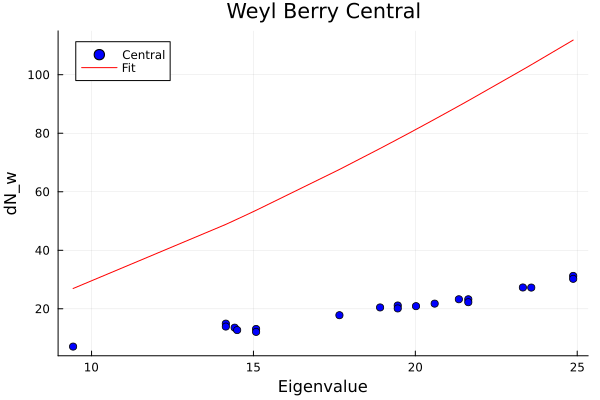

In [32]:
scatter(df_wb_central.eigenvalue, df_wb_central.dN_w, title="Weyl Berry Central", xlabel="Eigenvalue", ylabel="dN_w", label="Central", color=:blue)
plot!(df_wb_central.eigenvalue, df_wb_central.eigenvalue.^(d_arr_central[1]), label="Fit", color=:red)

## Comparisson
### Central Helmholtz

In [33]:
display(df_central)
println("d: ", d_arr_central[1])
println("d in [$(d_arr_central[2]), $(d_arr_central[3])]")

Row,mode_index,eigenvalue,degeneracy,ratio
,Int64,Float64,Int64,Float64
1,0,9.42994,1,2.12248
2,1,14.1469,2,3.18417
3,2,14.1469,2,3.18417
4,3,14.4199,1,3.24562
5,4,14.4969,1,3.26294
6,5,15.0824,2,3.39473
7,6,15.0824,2,3.39473
8,7,17.6559,1,3.97397
9,8,18.9114,1,4.25655


d: 1.467734515792357
d in [1.3420343859273627, 1.5934346456573512]


### Fourth order Hemholtz

In [34]:
display(df_4)
println("d: ", d_arr_4[1])
println("d in [$(d_arr_4[2]), $(d_arr_4[3])]")

Row,mode_index,eigenvalue,degeneracy,ratio
,Int64,Float64,Int64,Float64
1,0,9.44438,1,2.12573
2,1,14.1809,2,3.19182
3,2,14.1809,2,3.19182
4,3,14.4561,1,3.25377
5,4,14.532,1,3.27086
6,5,15.1075,2,3.40039
7,6,15.1075,2,3.40039
8,7,17.6885,1,3.98132
9,8,18.9501,1,4.26527


d: 1.4878682735534918
d in [1.3586815713572835, 1.6170549757497001]


In [35]:
function biharmonic_solver(C, l::Int, L::Float64)
    h = L/4^l
    # M_l = round(Int, size(C)[1]^2*L^2/L_l^2)
    M_l = round(Int, maximum(C))
    
    A = spzeros(M_l, M_l)
    for m in 1:size(C)[1]
        for n in 1:size(C)[2]
            if C[m,n] > 0
                A[C[m,n], C[m,n]] = 20/h^4 # Center
                if C[m-2, n] > 0   # u_i-2,j, Left
                    A[C[m,n], C[m-2,n]] = 1/(h^4)
                end
                if C[m-1,n] > 0   # u_i-1,j, Left
                    A[C[m,n], C[m-1,n]] = -8/(h^4)
                end
                if C[m+1,n] > 0   # u_i+1,j, Right
                    A[C[m,n], C[m+1,n]] = -8/(h^4)
                end
                if C[m+2,n] > 0   # u_i+2,j, Right
                    A[C[m,n], C[m+2,n]] = 1/(h^4)
                end
                if C[m,n-2] > 0   # u_i,j-2, Up
                    A[C[m,n], C[m,n-2]] = 1/(h^4)
                end
                if C[m,n-1] > 0   # u_i,j-1, Up
                    A[C[m,n], C[m,n-1]] = -8/(h^4)
                end
                if C[m,n+1] > 0   # u_i,j+1, Down
                    A[C[m,n], C[m,n+1]] = -8/(h^4)
                end
                if C[m,n+2] > 0   # u_i,j+2, Down
                    A[C[m,n], C[m,n+2]] = 1/(h^4)
                end
                if C[m-1,n-1] > 0   # u_i-1,j-1, Up-Left
                    A[C[m,n], C[m-1,n-1]] = 2/(h^4)
                end
                if C[m-1,n+1] > 0   # u_i-1,j+1, Down-Left
                    A[C[m,n], C[m-1,n+1]] = 2/(h^4)
                end
                if C[m+1,n-1] > 0   # u_i+1,j-1, Up-Right
                    A[C[m,n], C[m+1,n-1]] = 2/(h^4)
                end
                if C[m+1,n+1] > 0   # u_i+1,j+1, Down-Right
                    A[C[m,n], C[m+1,n+1]] = 2/(h^4)
                end
            end
        end
    end
    return A
end

biharmonic_solver (generic function with 1 method)

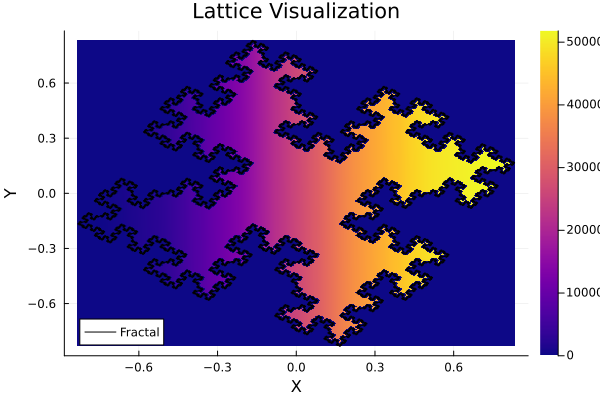

In [36]:
C_biharmonic = classification_matrix(classified_matrix, "Biharmonic")
A_biharmonic = biharmonic_solver(C_biharmonic, l, L)
heatmap(x, y, C_biharmonic, title="Classification Matrix", xlabel="x/L", ylabel="y/L", color=:plasma)
plot!(x_coords_frac, y_coords_frac, title="Lattice Visualization", xlabel="X", ylabel="Y", label="Fractal", color=:black)


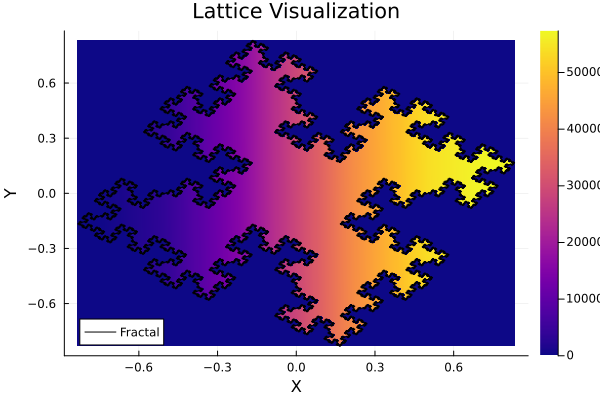

In [37]:
heatmap(x, y, C, title="Classification Matrix", xlabel="x/L", ylabel="y/L", color=:plasma)
plot!(x_coords_frac, y_coords_frac, title="Lattice Visualization", xlabel="X", ylabel="Y", label="Fractal", color=:black)

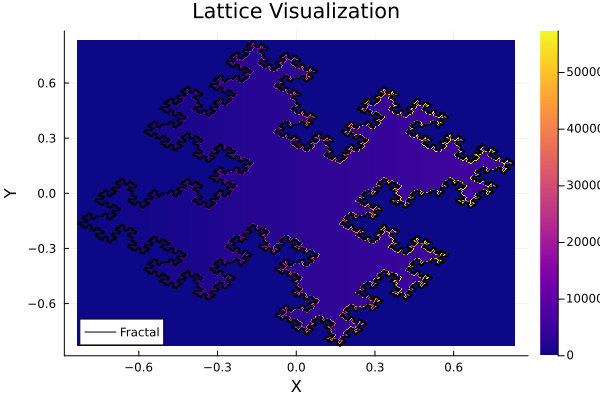

In [38]:
C_test = C .- C_biharmonic
heatmap(x, y, C_test, title="Classification Matrix", xlabel="x/L", ylabel="y/L", color=:plasma)
plot!(x_coords_frac, y_coords_frac, title="Lattice Visualization", xlabel="X", ylabel="Y", label="Fractal", color=:black)

In [39]:
A_biharmonic = biharmonic_solver(C_biharmonic, l, L)
display(A_biharmonic)

51797×51797 SparseMatrixCSC{Float64, Int64} with 641761 stored entries:
⎡⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⎦

In [ ]:
df_biharmonic, vecs_biharmonic, E_biharmonic = eigen_mode_matrix(C_biharmonic, A_biharmonic, 4, "Biharmonic", 10000, 1e-4)
println(size(E_biharmonic))
display(df_biharmonic)
CSV.write("data/l$(l)/Biharmonic_l$(l).csv", df_biharmonic)

┌ Error: XYAUPD_Exception: Maximum number of iterations taken. All possible eigenvalues of OP has been found.
│ IPARAM(5) returns the number of wanted converged Ritz values.
│   info = 1
└ @ Arpack C:\Users\jonas\.julia\packages\Arpack\FCvNd\src\libarpack.jl:47


Arpack.XYAUPD_Exception: 